In [1]:
# Recurrent Neural Networks (LSTM / RNN) Implementation with Keras - Python - youtube.com
# Simple example
# [1,2,3,4,5,6] -> [7,8,9]

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Data = [i for i in range(1000)]
#print(Data)

In [4]:
# Single-step prediction
def prepare_data(data, data_step):
    d = []
    t = []
    
    for i in range(len(data)-data_step):
        d.append([[el] for el in data[i:i+data_step]])
        t.append(data[i+data_step])
    
    return np.array(d, dtype=float), np.array(t, dtype=float)

# Multi-step prediction
def prepare_data_mod(data, data_step, target_step):
    d = []
    t = []
    
    for i in range(len(data)-data_step-target_size + 1):
        d.append([[el] for el in data[i:i+data_step]])
        t.append(data[i+data_step:i+data_step+target_step])
    
    return np.array(d, dtype=float), np.array(t, dtype=float)

In [5]:
step_size = 100
target_size = 20

# Single-step
#data, target = prepare_data(Data, step_size)
# Multi-step
data, target = prepare_data_mod(Data, step_size, target_size)

data.shape, target.shape

((881, 100, 1), (881, 20))

In [6]:
# Keep the last data to predict
data_last = data[len(data)-1]
data = data[:len(data)-1]
target_last = target[len(target)-1]
target = target[:len(target)-1]
print(data.shape, target.shape)

(880, 100, 1) (880, 20)


In [7]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((704, 100, 1), (704, 20), (176, 100, 1), (176, 20))

In [8]:
#x_test, y_test

In [9]:
# Normalize data - simple - divide by length of dataset
x_train = x_train/len(Data)
x_test = x_test/len(Data)
y_train = y_train/len(Data)
y_test = y_test/len(Data)

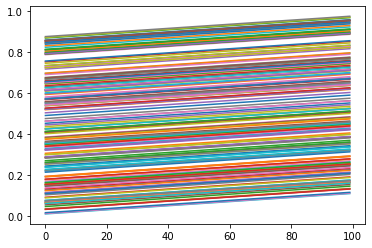

In [10]:
for el in x_test:
    plt.plot(el)
plt.show();

In [11]:
#Building model
model = Sequential()
model.add(LSTM(10, batch_input_shape=(None, None, 1) , return_sequences=True))
model.add(LSTM(20, return_sequences=False))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 10)          480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                2480      
Total params: 2,960
Trainable params: 2,960
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 2s 91ms/step - loss: 0.3411 - accuracy: 0.0000e+00 - val_loss: 0.2877 - val_accuracy: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 1s 40ms/step - loss: 0.2073 - accuracy: 0.0000e+00 - val_loss: 0.1148 - val_accuracy: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 1s 51ms/step - loss: 0.0711 - accuracy: 0.0000e+00 - val_loss: 0.0360 - val_accuracy: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0228 - accuracy: 0.0000e+00 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 1s 51ms/step - loss: 0.0110 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 7/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0046 - accuracy: 0.0000e

22/22 [==============================] - 1s 46ms/step - loss: 8.0830e-05 - accuracy: 0.4929 - val_loss: 7.1231e-05 - val_accuracy: 0.5739
Epoch 56/100
22/22 [==============================] - 1s 47ms/step - loss: 7.3577e-05 - accuracy: 0.5213 - val_loss: 6.3677e-05 - val_accuracy: 0.5511
Epoch 57/100
22/22 [==============================] - 1s 54ms/step - loss: 7.0008e-05 - accuracy: 0.5270 - val_loss: 6.2018e-05 - val_accuracy: 0.5341
Epoch 58/100
22/22 [==============================] - 1s 43ms/step - loss: 6.9554e-05 - accuracy: 0.5142 - val_loss: 6.1277e-05 - val_accuracy: 0.5227
Epoch 59/100
22/22 [==============================] - 1s 54ms/step - loss: 7.6104e-05 - accuracy: 0.5270 - val_loss: 6.6972e-05 - val_accuracy: 0.5057
Epoch 60/100
22/22 [==============================] - 1s 43ms/step - loss: 6.5555e-05 - accuracy: 0.4886 - val_loss: 5.6859e-05 - val_accuracy: 0.5739
Epoch 61/100
22/22 [==============================] - 1s 53ms/step - loss: 6.4866e-05 - accuracy: 0.5241 - 

In [14]:
x_test.shape, data_last.shape

((176, 100, 1), (100, 1))

In [15]:
results = model.predict(x_test)

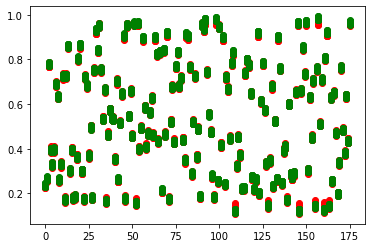

In [16]:
# Plot prediction results v. true test data
plt.plot(range(len(results)), results, 'ro')
plt.plot(range(len(results)), y_test, 'go')
plt.show()

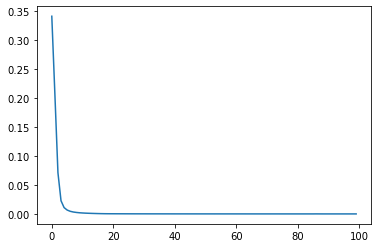

In [17]:
plt.plot(history.history['loss'])
plt.show()

In [18]:
# Plot data and results
def plot_graphs(dd, tg, res):
    plt.plot(range(len(dd)), dd, 'ro')
    plt.plot(range(len(dd), len(dd)+target_size), tg, 'bo')
    plt.plot(np.reshape([j for j in range(len(dd), len(dd)+target_size)], (1,target_size)), res, 'go')
    plt.show();

[0.127]


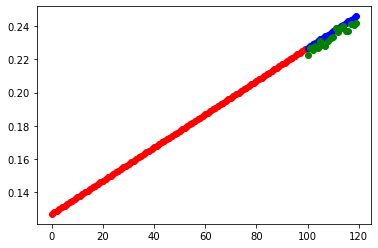

[0.157]


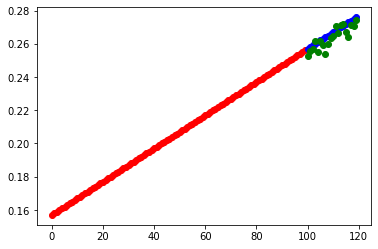

[0.668]


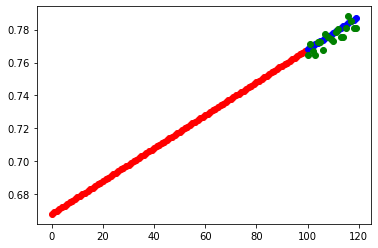

[0.286]


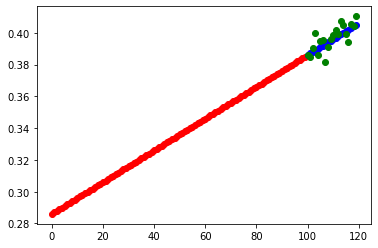

[0.22]


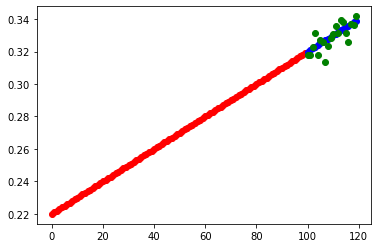

[0.287]


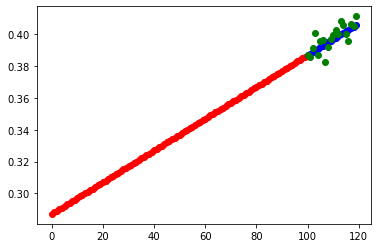

[0.58]


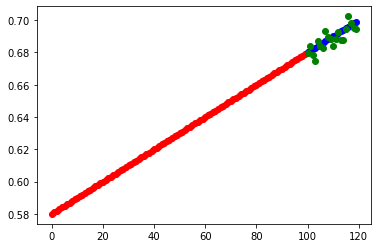

[0.524]


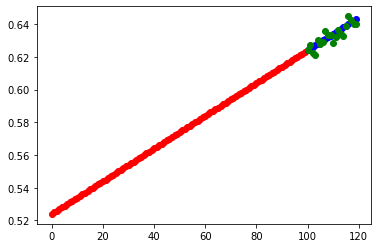

[0.152]


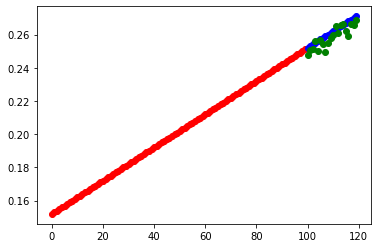

[0.221]


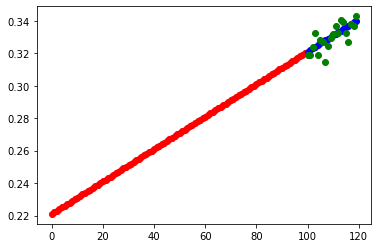

In [19]:
for ind in range(10):
    print(x_test[ind][0])
    dd = x_test[ind]
    tg = y_test[ind]
    dl = np.reshape(dd, (1, x_test.shape[1], 1))
    res = model.predict(dl)
    plot_graphs(dd, tg, res)

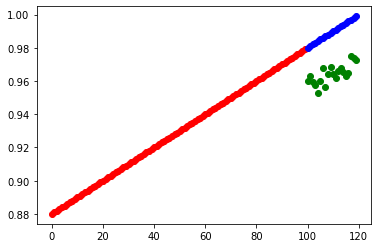

In [21]:
# Plot last data prediction
d_last = data_last / len(Data)
t_last = target_last / len(Data)

dd = d_last
tg = t_last
dl = np.reshape(dd, (1, x_test.shape[1], 1))
res = model.predict(dl)
#print(res)
plot_graphs(dd, tg, res)

In [22]:
print(res)

[[0.9601431  0.96318203 0.959258   0.9576491  0.9529675  0.960147
  0.9677191  0.95626724 0.96399915 0.96837276 0.96432805 0.9620429
  0.96582794 0.967568   0.96543574 0.963036   0.9648431  0.97517747
  0.973682   0.97279245]]
